In [5]:
import matplotlib.pyplot as plt
from skimage import data, filters, exposure, feature
from skimage.io import imread
from skimage.color import rgb2gray

import numpy as np
import cv2

# Lectura de archivos

In [6]:
depthFile = "../../data/Dataset_2/User1/Test/DepthImage20241112204422.png"
colorFile = "../../data/Dataset_2/User1/Test/FaceImage20241112204422.jpg"

colorImage = imread(colorFile)

depthImage = imread(depthFile)
depthImageNorm = depthImage[:, :, :3]
depthGray = rgb2gray(depthImageNorm)

# Uso de Otsu 
#### Separacion entre la cara y el fondo mediante la camara de profundidad

In [7]:
value = filters.threshold_otsu(depthGray)

binary = depthGray > value

faceOnly = np.zeros_like(colorImage)
faceOnly[binary] = colorImage[binary]

# Muestra de imagen actual

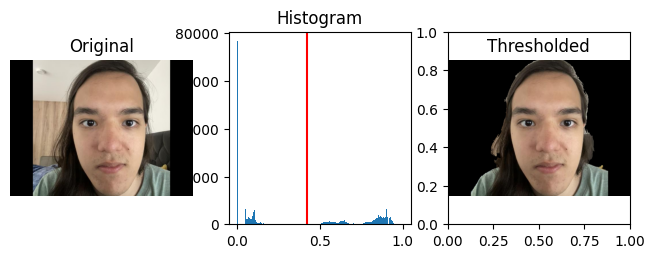

In [8]:
fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(colorImage)
ax[0].set_title("Original")
ax[0].axis("off")

ax[1].hist(depthGray.ravel(), bins=256)
ax[1].set_title("Histogram")
ax[1].axvline(value, color="r")

ax[2].imshow(faceOnly)
ax[2].set_title("Thresholded")
ax[2].axis("off")

plt.show()

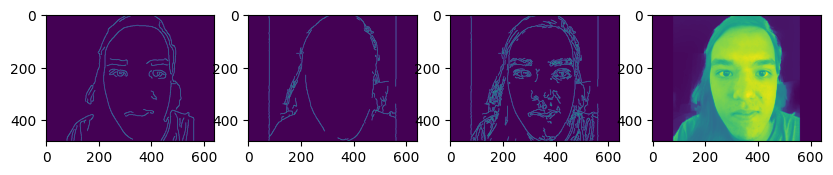

In [9]:
faceOnly1 = faceOnly
faceOnlyGray = rgb2gray(faceOnly)

depthOnly = depthGray

sumFace = faceOnlyGray + depthOnly

depthCanny = feature.canny(faceOnlyGray,sigma=3)
faceCanny = feature.canny(depthOnly)

sumCanny = feature.canny(sumFace)

fig = plt.figure(figsize=(10, 2))

fig.add_subplot(1, 4, 1)
plt.imshow(depthCanny)

fig.add_subplot(1, 4, 2)
plt.imshow(faceCanny)

fig.add_subplot(1, 4, 3)
plt.imshow(sumCanny)

fig.add_subplot(1, 4, 4)
plt.imshow(sumFace)